In [2]:
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
from datetime import date

import bt

import matplotlib.pyplot as plt
from ffn import *
from importlib import reload
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import zscore

In [1]:
# read file containing momentum signal

In [3]:
# read daily dataframe
df = pd.read_parquet('momentum_NSE_200_updated_21stNov.parquet')

In [4]:
df.head()

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_9_rank,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile
2205,ABB India Ltd.,2018-01-05,1435.1,ABB IN Equity,INE117A01022,Industrials,0.125584,-0.976181,-1.076045,-0.475453,...,134.0,8,126.0,7,100.0,6,104.0,6.0,NaN,NaN
2206,ABB India Ltd.,2018-01-08,1437.6,ABB IN Equity,INE117A01022,Industrials,0.174204,-1.027277,-1.169179,-0.444239,...,133.0,7,124.0,7,102.0,6,110.0,6.0,NaN,NaN
2207,ABB India Ltd.,2018-01-09,1419.3,ABB IN Equity,INE117A01022,Industrials,-1.272955,-1.035835,-1.202220,-0.779455,...,156.0,9,153.0,8,106.0,6,109.0,6.0,NaN,NaN
2208,ABB India Ltd.,2018-01-10,1415.4,ABB IN Equity,INE117A01022,Industrials,-0.274783,-1.111463,-1.332743,-0.853032,...,160.0,9,160.0,9,105.0,6,106.0,6.0,NaN,NaN
2209,ABB India Ltd.,2018-01-11,1399.6,ABB IN Equity,INE117A01022,Industrials,-1.116292,-1.128813,-1.388814,-0.997627,...,164.0,9,164.0,9,109.0,6,110.0,6.0,NaN,NaN


In [5]:
df.tail()

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_9_rank,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile
432354,Zydus Lifesciences Ltd.,2024-11-11,967.75,ZYDUSLIF IN Equity,INE010B01027,Health Care,-0.267945,-0.472658,-0.507847,0.449729,...,78.0,4,78.0,4,60.0,3,30.0,2.0,141.0,6.0
432355,Zydus Lifesciences Ltd.,2024-11-12,949.75,ZYDUSLIF IN Equity,INE010B01027,Health Care,-1.859985,-0.408296,-0.464076,0.363711,...,88.0,4,85.0,4,71.0,3,40.0,2.0,161.0,7.0
432356,Zydus Lifesciences Ltd.,2024-11-13,963.75,ZYDUSLIF IN Equity,INE010B01027,Health Care,1.474072,-0.259404,-0.320174,0.480581,...,74.0,3,78.0,4,53.0,3,31.0,2.0,126.0,6.0
432357,Zydus Lifesciences Ltd.,2024-11-14,957.40,ZYDUSLIF IN Equity,INE010B01027,Health Care,-0.658885,-0.324313,-0.400657,0.095832,...,117.0,5,111.0,5,62.0,3,31.0,2.0,107.0,5.0
432358,Zydus Lifesciences Ltd.,2024-11-18,944.70,ZYDUSLIF IN Equity,INE010B01027,Health Care,-1.326509,-0.550747,-0.693321,0.064195,...,119.0,5,111.0,5,64.0,3,37.0,2.0,152.0,7.0


In [10]:
df.shape

(374229, 28)

In [13]:
df = df[df['returns']!=0]

In [14]:
df[(df['date']=='2024-11-18') & (df['BB Symbol']=='LICI IN Equity')]

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_9_rank,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile
432982,Life Insurance Corporation of India,2024-11-18,901.75,LICI IN Equity,INE0J1Y01017,Financials,-0.759368,-0.834735,-1.826942,-0.742198,...,187.0,8,204.0,9,220.0,9,220.0,9.0,55.0,3.0


In [17]:
df[(df['date']=='2024-10-07') & (df['BB Symbol']=='AL IN Equity')]

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_9_rank,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile
41953,Ashok Leyland Ltd.,2024-10-07,222.42,AL IN Equity,INE208A01029,Industrials,-1.317716,0.739905,0.583434,0.020125,...,110.0,5,110.0,5,154.0,7,156.0,7.0,99.0,4.0


In [6]:
df[df['date']=='2024-11-18'].to_csv("adhoc_test.csv")

In [6]:
df.date.unique()

<DatetimeArray>
['2018-01-05 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
 '2018-01-10 00:00:00', '2018-01-11 00:00:00', '2018-01-12 00:00:00',
 '2018-01-15 00:00:00', '2018-01-16 00:00:00', '2018-01-17 00:00:00',
 '2018-01-18 00:00:00',
 ...
 '2024-11-04 00:00:00', '2024-11-05 00:00:00', '2024-11-06 00:00:00',
 '2024-11-07 00:00:00', '2024-11-08 00:00:00', '2024-11-11 00:00:00',
 '2024-11-12 00:00:00', '2024-11-13 00:00:00', '2024-11-14 00:00:00',
 '2024-11-18 00:00:00']
Length: 1701, dtype: datetime64[ns]

In [7]:
df.shape

(362494, 28)

In [8]:
# Extract the year and week
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.isocalendar().week


In [9]:
df.head()

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,year,week
252,ABB India Ltd.,2018-01-05,1435.1,ABB IN Equity,INE117A01022,Industrials,0.125584,-0.976181,-1.076045,-0.475453,...,126.0,7,100.0,6,104.0,6,NaN,NaN,2018,1
253,ABB India Ltd.,2018-01-08,1437.6,ABB IN Equity,INE117A01022,Industrials,0.174204,-1.027277,-1.169179,-0.444239,...,124.0,7,102.0,6,110.0,6,NaN,NaN,2018,2
254,ABB India Ltd.,2018-01-09,1419.3,ABB IN Equity,INE117A01022,Industrials,-1.272955,-1.035835,-1.202220,-0.779455,...,153.0,8,106.0,6,109.0,6,NaN,NaN,2018,2
255,ABB India Ltd.,2018-01-10,1415.4,ABB IN Equity,INE117A01022,Industrials,-0.274783,-1.111463,-1.332743,-0.853032,...,160.0,9,105.0,6,106.0,6,NaN,NaN,2018,2
256,ABB India Ltd.,2018-01-11,1399.6,ABB IN Equity,INE117A01022,Industrials,-1.116292,-1.128813,-1.388814,-0.997627,...,164.0,9,109.0,6,110.0,6,NaN,NaN,2018,2


In [10]:
df[df.week ==1]

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,year,week
252,ABB India Ltd.,2018-01-05,1435.10,ABB IN Equity,INE117A01022,Industrials,0.125584,-0.976181,-1.076045,-0.475453,...,126.0,7,100.0,6,104.0,6,NaN,NaN,2018,1
493,ABB India Ltd.,2018-12-31,1336.75,ABB IN Equity,INE117A01022,Industrials,1.785578,0.713632,0.982173,0.260751,...,83.0,5,85.0,5,90.0,5,152.0,8.0,2018,1
990,ABB India Ltd.,2019-01-01,1319.20,ABB IN Equity,INE117A01022,Industrials,-1.312886,0.647773,0.897719,0.238249,...,82.0,4,87.0,5,90.0,5,158.0,8.0,2019,1
989,ABB India Ltd.,2019-01-02,1319.25,ABB IN Equity,INE117A01022,Industrials,0.003790,0.612126,0.867883,0.346995,...,71.0,4,79.0,4,86.0,5,127.0,7.0,2019,1
988,ABB India Ltd.,2019-01-03,1308.95,ABB IN Equity,INE117A01022,Industrials,-0.780747,0.639627,0.935080,0.260489,...,80.0,4,84.0,5,89.0,5,122.0,7.0,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417462,Zydus Lifesciences Ltd.,2024-01-01,699.15,ZYDUSLIF IN Equity,INE010B01027,Health Care,1.443703,-0.330993,-0.040097,-0.180595,...,74.0,4,66.0,3,26.0,2,188.0,9.0,2024,1
417463,Zydus Lifesciences Ltd.,2024-01-02,712.25,ZYDUSLIF IN Equity,INE010B01027,Health Care,1.873704,-0.223296,0.128987,-0.142141,...,65.0,3,54.0,3,23.0,2,161.0,8.0,2024,1
417464,Zydus Lifesciences Ltd.,2024-01-03,710.40,ZYDUSLIF IN Equity,INE010B01027,Health Care,-0.259740,-0.187858,0.189912,-0.193613,...,73.0,4,54.0,3,23.0,2,149.0,7.0,2024,1
417465,Zydus Lifesciences Ltd.,2024-01-04,709.15,ZYDUSLIF IN Equity,INE010B01027,Health Care,-0.175957,-0.213189,0.167081,-0.223525,...,81.0,4,55.0,3,21.0,1,138.0,7.0,2024,1


In [11]:
# Set the date column as the index
#df = df.set_index('date')

In [12]:
#df.head()

In [13]:
# Add a new column for the week ending date
df['week_end_date'] = df['date'] + pd.offsets.Week(weekday=4)

In [14]:
df.head()

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,year,week,week_end_date
252,ABB India Ltd.,2018-01-05,1435.1,ABB IN Equity,INE117A01022,Industrials,0.125584,-0.976181,-1.076045,-0.475453,...,7,100.0,6,104.0,6,NaN,NaN,2018,1,2018-01-12
253,ABB India Ltd.,2018-01-08,1437.6,ABB IN Equity,INE117A01022,Industrials,0.174204,-1.027277,-1.169179,-0.444239,...,7,102.0,6,110.0,6,NaN,NaN,2018,2,2018-01-12
254,ABB India Ltd.,2018-01-09,1419.3,ABB IN Equity,INE117A01022,Industrials,-1.272955,-1.035835,-1.202220,-0.779455,...,8,106.0,6,109.0,6,NaN,NaN,2018,2,2018-01-12
255,ABB India Ltd.,2018-01-10,1415.4,ABB IN Equity,INE117A01022,Industrials,-0.274783,-1.111463,-1.332743,-0.853032,...,9,105.0,6,106.0,6,NaN,NaN,2018,2,2018-01-12
256,ABB India Ltd.,2018-01-11,1399.6,ABB IN Equity,INE117A01022,Industrials,-1.116292,-1.128813,-1.388814,-0.997627,...,9,109.0,6,110.0,6,NaN,NaN,2018,2,2018-01-12


In [15]:
df.tail()

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,year,week,week_end_date
417677,Zydus Lifesciences Ltd.,2024-11-11,967.75,ZYDUSLIF IN Equity,INE010B01027,Health Care,-0.267945,-0.509527,-0.594454,0.439465,...,4,56.0,3,26.0,2,115.0,6.0,2024,46,2024-11-15
417678,Zydus Lifesciences Ltd.,2024-11-12,949.75,ZYDUSLIF IN Equity,INE010B01027,Health Care,-1.859985,-0.423096,-0.520733,0.354093,...,4,66.0,3,37.0,2,131.0,6.0,2024,46,2024-11-15
417679,Zydus Lifesciences Ltd.,2024-11-13,963.75,ZYDUSLIF IN Equity,INE010B01027,Health Care,1.474072,-0.269962,-0.375664,0.468184,...,4,49.0,3,27.0,2,97.0,5.0,2024,46,2024-11-15
417680,Zydus Lifesciences Ltd.,2024-11-14,957.40,ZYDUSLIF IN Equity,INE010B01027,Health Care,-0.658885,-0.338797,-0.465992,0.064145,...,5,58.0,3,28.0,2,82.0,4.0,2024,46,2024-11-15
417681,Zydus Lifesciences Ltd.,2024-11-18,944.70,ZYDUSLIF IN Equity,INE010B01027,Health Care,-1.326509,-0.559625,-0.783652,0.036820,...,5,60.0,3,33.0,2,120.0,6.0,2024,47,2024-11-22


In [16]:
## now we will take base portfolio 

In [23]:
base_port = pd.read_csv('qtr_portfolio_18_24.csv')

In [24]:
base_port.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt
0,01-04-2018,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333
1,01-04-2018,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333
2,01-04-2018,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333
3,01-04-2018,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333
4,01-04-2018,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333


In [25]:
#base_port = base_port.drop(columns='Unnamed: 0',axis=1)

In [26]:
base_port.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt
0,01-04-2018,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333
1,01-04-2018,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333
2,01-04-2018,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333
3,01-04-2018,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333
4,01-04-2018,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333


In [27]:
base_port.dtypes

date                object
BB Symbol           object
Stock Name          object
Strat               object
factor_quantile     object
Wt                 float64
dtype: object

In [28]:
base_port['date'] = pd.to_datetime(base_port['date'], dayfirst=True)

In [29]:
base_port.groupby('date')['BB Symbol'].count().head(20)

date
2018-04-01    30
2018-07-01    30
2018-10-01    30
2019-01-01    30
2019-04-01    30
2019-07-01    30
2019-10-01    30
2020-01-01    30
2020-04-01    30
2020-07-01    30
2020-10-01    30
2021-01-01    30
2021-04-01    30
2021-07-01    30
2021-10-01    30
2022-01-01    30
2022-04-01    30
2022-07-01    30
2022-10-01    29
2023-01-01    30
Name: BB Symbol, dtype: int64

In [30]:
base_port.groupby('date')['BB Symbol'].count().tail(20)

date
2020-01-01    30
2020-04-01    30
2020-07-01    30
2020-10-01    30
2021-01-01    30
2021-04-01    30
2021-07-01    30
2021-10-01    30
2022-01-01    30
2022-04-01    30
2022-07-01    30
2022-10-01    29
2023-01-01    30
2023-04-01    30
2023-07-01    30
2023-10-01    30
2024-01-01    30
2024-04-01    30
2024-07-01    30
2024-10-01    30
Name: BB Symbol, dtype: int64

In [31]:
# Get the unique quarter start dates in ascending order
quarter_start_dates = base_port['date'].unique()
#quarter_start_dates.sort()

In [32]:
quarter_start_dates

<DatetimeArray>
['2018-04-01 00:00:00', '2018-07-01 00:00:00', '2018-10-01 00:00:00',
 '2019-01-01 00:00:00', '2019-04-01 00:00:00', '2019-07-01 00:00:00',
 '2019-10-01 00:00:00', '2020-01-01 00:00:00', '2020-04-01 00:00:00',
 '2020-07-01 00:00:00', '2020-10-01 00:00:00', '2021-01-01 00:00:00',
 '2021-04-01 00:00:00', '2021-07-01 00:00:00', '2021-10-01 00:00:00',
 '2022-01-01 00:00:00', '2022-04-01 00:00:00', '2022-07-01 00:00:00',
 '2022-10-01 00:00:00', '2023-01-01 00:00:00', '2023-04-01 00:00:00',
 '2023-07-01 00:00:00', '2023-10-01 00:00:00', '2024-01-01 00:00:00',
 '2024-04-01 00:00:00', '2024-07-01 00:00:00', '2024-10-01 00:00:00']
Length: 27, dtype: datetime64[ns]

In [28]:
# Create an empty list to store the expanded data
expanded_data = []

In [29]:
# Iterate through each unique quarter start date
for i, start_date in enumerate(quarter_start_dates):
    # Determine the end date for this quarter
    if i + 1 < len(quarter_start_dates):
        # If there is a next quarter start date, set the end date to the day before it
        next_start_date = quarter_start_dates[i + 1]
        end_date = next_start_date - pd.Timedelta(days=1)
    else:
        # If this is the last quarter start date, set the end date to the quarter end
        end_date = start_date + pd.offsets.QuarterEnd(0)

    # Generate weekly dates starting from the quarter start date until the end date
    weekly_dates = pd.date_range(start=start_date, end=end_date, freq='W-SUN')

    # Ensure the quarter start date is included as the first date
    if weekly_dates[0] != start_date:
        weekly_dates = weekly_dates.insert(0, start_date)

    # Remove the last date in weekly_dates if it’s too close to the next quarter start date
    if i + 1 < len(quarter_start_dates) and (next_start_date - weekly_dates[-1]).days < 7:
        weekly_dates = weekly_dates[:-1]

    # Filter records for the current quarter start date
    quarter_data = base_port[base_port['date'] == start_date]

    # Replicate each row for each weekly date and add to the expanded data
    for weekly_date in weekly_dates:
        # Create a copy of the quarter data and update the date to the current weekly date
        weekly_data = quarter_data.copy()
        weekly_data['date'] = weekly_date
        expanded_data.append(weekly_data)



In [30]:
# Concatenate all weekly data into a single DataFrame
expanded_base_port = pd.concat(expanded_data).reset_index(drop=True)

In [31]:
expanded_base_port

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333
1,2018-04-01,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333
2,2018-04-01,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333
3,2018-04-01,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333
4,2018-04-01,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333
...,...,...,...,...,...,...
10571,2024-12-29,SBIN IN Equity,State Bank of India.,Cons,Cons,0.033333
10572,2024-12-29,SHFL IN Equity,Shriram Finance Ltd.,Cons,Cons,0.033333
10573,2024-12-29,TPWR IN Equity,Tata Power Company Ltd.,Cons,Cons,0.033333
10574,2024-12-29,TTMT IN Equity,Tata Motors Ltd.,Cons,Cons,0.033333


In [28]:
#expanded_base_port.to_csv("test.csv")

In [32]:
working_df = expanded_base_port.copy()

In [33]:
working_df['week_end_date'] = working_df['date'] + pd.offsets.Week(weekday=4)

In [34]:
working_df

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,week_end_date
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333,2018-04-06
1,2018-04-01,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333,2018-04-06
2,2018-04-01,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333,2018-04-06
3,2018-04-01,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333,2018-04-06
4,2018-04-01,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333,2018-04-06
...,...,...,...,...,...,...,...
10571,2024-12-29,SBIN IN Equity,State Bank of India.,Cons,Cons,0.033333,2025-01-03
10572,2024-12-29,SHFL IN Equity,Shriram Finance Ltd.,Cons,Cons,0.033333,2025-01-03
10573,2024-12-29,TPWR IN Equity,Tata Power Company Ltd.,Cons,Cons,0.033333,2025-01-03
10574,2024-12-29,TTMT IN Equity,Tata Motors Ltd.,Cons,Cons,0.033333,2025-01-03


In [35]:
# Create a new column 'prev_week_end_date' by subtracting 7 days from 'week_end_date'
working_df['prev_week_end_date'] = working_df['week_end_date'] - pd.Timedelta(days=7)

In [36]:
working_df

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,week_end_date,prev_week_end_date
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30
1,2018-04-01,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30
2,2018-04-01,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30
3,2018-04-01,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30
4,2018-04-01,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30
...,...,...,...,...,...,...,...,...
10571,2024-12-29,SBIN IN Equity,State Bank of India.,Cons,Cons,0.033333,2025-01-03,2024-12-27
10572,2024-12-29,SHFL IN Equity,Shriram Finance Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27
10573,2024-12-29,TPWR IN Equity,Tata Power Company Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27
10574,2024-12-29,TTMT IN Equity,Tata Motors Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27


In [37]:
df.head()

,Company Name,date,Price,BB Symbol,ISIN,Sector,returns,momentum_6,momentum_RA_6,momentum_9,...,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,year,week,week_end_date
252,ABB India Ltd.,2018-01-05,1435.1,ABB IN Equity,INE117A01022,Industrials,0.125584,-0.976181,-1.076045,-0.475453,...,7,100.0,6,104.0,6,NaN,NaN,2018,1,2018-01-12
253,ABB India Ltd.,2018-01-08,1437.6,ABB IN Equity,INE117A01022,Industrials,0.174204,-1.027277,-1.169179,-0.444239,...,7,102.0,6,110.0,6,NaN,NaN,2018,2,2018-01-12
254,ABB India Ltd.,2018-01-09,1419.3,ABB IN Equity,INE117A01022,Industrials,-1.272955,-1.035835,-1.202220,-0.779455,...,8,106.0,6,109.0,6,NaN,NaN,2018,2,2018-01-12
255,ABB India Ltd.,2018-01-10,1415.4,ABB IN Equity,INE117A01022,Industrials,-0.274783,-1.111463,-1.332743,-0.853032,...,9,105.0,6,106.0,6,NaN,NaN,2018,2,2018-01-12
256,ABB India Ltd.,2018-01-11,1399.6,ABB IN Equity,INE117A01022,Industrials,-1.116292,-1.128813,-1.388814,-0.997627,...,9,109.0,6,110.0,6,NaN,NaN,2018,2,2018-01-12


In [38]:
df.columns

Index(['Company Name', 'date', 'Price', 'BB Symbol', 'ISIN', 'Sector',
       'returns', 'momentum_6', 'momentum_RA_6', 'momentum_9', 'momentum_RA_9',
       'momentum_12', 'momentum_RA_12', 'MIF', 'momentum_6_rank',
       'momentum__6_decile', 'momentum_RA_6_rank', 'momentum_RA_6_decile',
       'momentum_9_rank', 'momentum__9_decile', 'momentum_RA_9_rank',
       'momentum_RA_9_decile', 'momentum_12_rank', 'momentum__12_decile',
       'momentum_RA_12_rank', 'momentum_RA_12_decile', 'MIF_rank',
       'MIF_decile', 'year', 'week', 'week_end_date'],
      dtype='object')

In [39]:
columns_to_merge = [
    'BB Symbol', 'date', 'Price', 'Sector', 'momentum_6', 'momentum_RA_6', 'momentum_9',
       'momentum_RA_9', 'momentum_12', 'momentum_RA_12', 'MIF',
       'momentum_6_rank', 'momentum__6_decile', 'momentum_RA_6_rank',
       'momentum_RA_6_decile', 'momentum_9_rank', 'momentum__9_decile',
       'momentum_RA_9_rank', 'momentum_RA_9_decile', 'momentum_12_rank',
       'momentum__12_decile', 'momentum_RA_12_rank', 'momentum_RA_12_decile',
       'MIF_rank', 'MIF_decile', 'week_end_date'
]

In [40]:
df_week = df.groupby(['BB Symbol', 'week_end_date'], as_index=False).last()

In [41]:
df_week

,BB Symbol,week_end_date,Company Name,date,Price,ISIN,Sector,returns,momentum_6,momentum_RA_6,...,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,year,week
0,ABB IN Equity,2018-01-12,ABB India Ltd.,2018-01-11,1399.60,INE117A01022,Industrials,-1.116292,-1.128813,-1.388814,...,164.0,9,109.0,6,110.0,6,NaN,NaN,2018,2
1,ABB IN Equity,2018-01-19,ABB India Ltd.,2018-01-18,1541.90,INE117A01022,Industrials,-0.426219,-0.354342,-0.176950,...,118.0,7,98.0,6,86.0,5,NaN,NaN,2018,3
2,ABB IN Equity,2018-01-26,ABB India Ltd.,2018-01-25,1659.30,INE117A01022,Industrials,-0.500705,0.076360,0.507681,...,91.0,5,78.0,5,65.0,4,NaN,NaN,2018,4
3,ABB IN Equity,2018-02-02,ABB India Ltd.,2018-02-01,1700.45,INE117A01022,Industrials,2.858093,0.375086,0.859703,...,78.0,5,52.0,3,42.0,3,NaN,NaN,2018,5
4,ABB IN Equity,2018-02-09,ABB India Ltd.,2018-02-08,1594.85,INE117A01022,Industrials,1.035793,0.278332,0.676367,...,137.0,8,52.0,3,42.0,3,NaN,NaN,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76508,ZYDUSLIF IN Equity,2024-10-25,Zydus Lifesciences Ltd.,2024-10-24,1005.70,INE010B01027,Health Care,0.469530,-0.021345,-0.019182,...,33.0,2,54.0,3,21.0,1,31.0,2.0,2024,43
76509,ZYDUSLIF IN Equity,2024-11-01,Zydus Lifesciences Ltd.,2024-10-31,1001.25,INE010B01027,Health Care,1.613640,-0.203220,-0.261569,...,44.0,2,53.0,3,22.0,1,112.0,6.0,2024,44
76510,ZYDUSLIF IN Equity,2024-11-08,Zydus Lifesciences Ltd.,2024-11-07,973.25,INE010B01027,Health Care,-2.195759,-0.516981,-0.568946,...,61.0,3,56.0,3,30.0,2,114.0,6.0,2024,45
76511,ZYDUSLIF IN Equity,2024-11-15,Zydus Lifesciences Ltd.,2024-11-14,957.40,INE010B01027,Health Care,-0.658885,-0.338797,-0.465992,...,99.0,5,58.0,3,28.0,2,82.0,4.0,2024,46


In [42]:
# Perform the merge with specified columns only
merged_df = working_df.merge(
    df_week[columns_to_merge],  # Select only the necessary columns from df
    left_on=['BB Symbol', 'prev_week_end_date'],
    right_on=['BB Symbol', 'week_end_date'],
    suffixes=('', '_df'),  # Adding '_df' suffix to columns from df
    how='left'  # Ensures all rows in working_df are retained
)


In [43]:
merged_df.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,week_end_date,prev_week_end_date,date_df,Price,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,week_end_date_df
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30,2018-03-28,145.45,...,1.0,7.0,1.0,14.0,1.0,14.0,1.0,18.0,1.0,2018-03-30
1,2018-04-01,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30,2018-03-28,277.05,...,5.0,88.0,5.0,51.0,3.0,63.0,4.0,159.0,9.0,2018-03-30
2,2018-04-01,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30,2018-03-28,2664.50,...,3.0,31.0,2.0,62.0,4.0,44.0,3.0,66.0,4.0,2018-03-30
3,2018-04-01,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30,2018-03-28,498.04,...,6.0,98.0,6.0,69.0,4.0,66.0,4.0,91.0,5.0,2018-03-30
4,2018-04-01,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333,2018-04-06,2018-03-30,2018-03-28,525.15,...,3.0,60.0,4.0,16.0,1.0,22.0,2.0,52.0,3.0,2018-03-30


In [44]:
merged_df.tail()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,week_end_date,prev_week_end_date,date_df,Price,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,week_end_date_df
10571,2024-12-29,SBIN IN Equity,State Bank of India.,Cons,Cons,0.033333,2025-01-03,2024-12-27,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
10572,2024-12-29,SHFL IN Equity,Shriram Finance Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
10573,2024-12-29,TPWR IN Equity,Tata Power Company Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
10574,2024-12-29,TTMT IN Equity,Tata Motors Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
10575,2024-12-29,ZYDUSLIF IN Equity,Zydus Lifesciences Ltd.,Cons,Cons,0.033333,2025-01-03,2024-12-27,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [45]:
merged_df = merged_df.drop(columns=['week_end_date','prev_week_end_date','week_end_date_df'])

In [46]:
merged_df.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum_9_rank,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333,2018-03-28,145.45,Industrials,1.090721,...,12.0,1.0,7.0,1.0,14.0,1.0,14.0,1.0,18.0,1.0
1,2018-04-01,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333,2018-03-28,277.05,Consumer Discretionary,0.326071,...,82.0,5.0,88.0,5.0,51.0,3.0,63.0,4.0,159.0,9.0
2,2018-04-01,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333,2018-03-28,2664.50,Financials,-0.288474,...,40.0,3.0,31.0,2.0,62.0,4.0,44.0,3.0,66.0,4.0
3,2018-04-01,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333,2018-03-28,498.04,Industrials,-0.363579,...,99.0,6.0,98.0,6.0,69.0,4.0,66.0,4.0,91.0,5.0
4,2018-04-01,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333,2018-03-28,525.15,Materials,0.941725,...,48.0,3.0,60.0,4.0,16.0,1.0,22.0,2.0,52.0,3.0


In [47]:
merged_df.tail()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum_9_rank,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile
10571,2024-12-29,SBIN IN Equity,State Bank of India.,Cons,Cons,0.033333,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10572,2024-12-29,SHFL IN Equity,Shriram Finance Ltd.,Cons,Cons,0.033333,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10573,2024-12-29,TPWR IN Equity,Tata Power Company Ltd.,Cons,Cons,0.033333,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10574,2024-12-29,TTMT IN Equity,Tata Motors Ltd.,Cons,Cons,0.033333,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10575,2024-12-29,ZYDUSLIF IN Equity,Zydus Lifesciences Ltd.,Cons,Cons,0.033333,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def add_cash_position(portfolio_df):
    """
    Adds a 'Cash' record to each unique date in the portfolio.
    
    Parameters:
    portfolio_df (pd.DataFrame): The base portfolio DataFrame.
    
    Returns:
    pd.DataFrame: The portfolio with an added 'Cash' position for each date.
    """
    # Extract unique dates from the portfolio
    unique_dates = portfolio_df['date'].unique()
    
    # Create a list to hold cash rows
    cash_rows = []
    
    # Define the cash row template
    for date in unique_dates:
        cash_row = {
            'date': date,
            'BB Symbol': 'Cash',
            'Stock Name': 'Cash',
            'Strat': 'Cons',
            'factor_quantile': 'Cons',
            'Wt': 0.0,
            # Fill NaN for other columns or add placeholders if needed
            'date_df': pd.NaT,
            'Price': None,
            'Mkt_cap': None,
            'Sector': 'Cash',
         
        }
        cash_rows.append(cash_row)
    
    # Convert cash rows to a DataFrame
    cash_df = pd.DataFrame(cash_rows)
    
    # Append the cash_df to the original portfolio DataFrame
    updated_portfolio = pd.concat([portfolio_df, cash_df], ignore_index=True)
    
    # Sort by date to keep the DataFrame organized
    updated_portfolio = updated_portfolio.sort_values(by=['date', 'BB Symbol']).reset_index(drop=True)
    
    return updated_portfolio


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
updated_portfolio = add_cash_position(merged_df)

In [51]:
updated_portfolio[updated_portfolio['BB Symbol']=='Cash'].tail(30)

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,Mkt_cap
10006,2024-06-09,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10037,2024-06-16,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10068,2024-06-23,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10097,2024-07-01,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10128,2024-07-07,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10159,2024-07-14,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10190,2024-07-21,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10221,2024-07-28,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10252,2024-08-04,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
10283,2024-08-11,Cash,Cash,Cons,Cons,0.0,NaT,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [52]:
updated_portfolio.shape

(10929, 31)

In [53]:
updated_portfolio[updated_portfolio['date']<='2024-11-03'].tail()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,Mkt_cap
10676,2024-11-03,SBIN IN Equity,State Bank of India.,Cons,Cons,0.033333,2024-10-31,820.20,Financials,-0.340403,...,3.0,52.0,3.0,91.0,5.0,84.0,4.0,20.0,1.0,NaN
10677,2024-11-03,SHFL IN Equity,Shriram Finance Ltd.,Cons,Cons,0.033333,2024-10-31,3138.90,Financials,0.784932,...,3.0,69.0,4.0,69.0,4.0,73.0,4.0,197.0,10.0,NaN
10678,2024-11-03,TPWR IN Equity,Tata Power Company Ltd.,Cons,Cons,0.033333,2024-10-31,440.05,Utilities,-0.490926,...,5.0,117.0,6.0,36.0,2.0,37.0,2.0,94.0,5.0,NaN
10679,2024-11-03,TTMT IN Equity,Tata Motors Ltd.,Cons,Cons,0.033333,2024-10-31,834.05,Consumer Discretionary,-1.410004,...,8.0,169.0,8.0,136.0,7.0,125.0,6.0,162.0,8.0,NaN
10680,2024-11-03,ZYDUSLIF IN Equity,Zydus Lifesciences Ltd.,Cons,Cons,0.033333,2024-10-31,1001.25,Health Care,-0.203220,...,3.0,44.0,2.0,53.0,3.0,22.0,1.0,112.0,6.0,NaN


In [54]:
updated_portfolio = updated_portfolio[updated_portfolio['date']<='2024-11-03']

In [55]:
updated_portfolio.to_csv("base_withcash_24.csv")

In [18]:
updated_portfolio = pd.read_csv("base_withcash_24.csv")

In [74]:


def inclusion_exclusion(portfolio_df, column_name, quarter_start_dates, threshold=4):
    """
    Applies inclusion and exclusion rules to the portfolio DataFrame based on a specified column,
    ensuring total weight sums to 1 at each date and tracking excluded securities.

    Parameters:
    portfolio_df (pd.DataFrame): The input portfolio DataFrame with columns including 'date', 'BB Symbol', 'Wt', and the rule column.
    column_name (str): The name of the column on which inclusion and exclusion rules will be based.
    quarter_start_dates (list): List of dates that are the start of each quarter.
    threshold (int): The decile threshold for inclusion/exclusion (default is 4).

    Returns:
    pd.DataFrame: Updated DataFrame with adjusted weights and exclusion tracking.
    pd.DataFrame: DataFrame tracking excluded securities for each date.
    """
    # Sort the DataFrame by date and reset index
    portfolio_df = portfolio_df.sort_values(by='date').reset_index(drop=True)
    
    # Initialize variables
    unique_dates = sorted(portfolio_df['date'].unique())
    initial_security_count = portfolio_df[(portfolio_df['date'] == unique_dates[0]) & (portfolio_df['BB Symbol'] != 'Cash')]['BB Symbol'].nunique()
    initial_weight = 1 / initial_security_count
    excluded_securities = set()  # Track securities to exclude within the current quarter
    output_portfolio = []        # List to store updated rows for each date
    exclusion_log = []           # Track excluded securities for manual review

    # Flag to indicate if we are on the very first date
    first_date = True

    # Iterate through each unique date
    for date in unique_dates:
        daily_data = portfolio_df[portfolio_df['date'] == date].copy()
        
        # Determine if this is a quarter start (excluding the very first date)
        is_quarter_start = date in quarter_start_dates and not first_date
        
        # Separate cash row and securities rows for easy manipulation
        cash_row = daily_data[daily_data['BB Symbol'] == 'Cash']
        security_rows = daily_data[daily_data['BB Symbol'] != 'Cash'].copy()
        
        if first_date:
            # For the very first date, include all securities without applying any rules
            security_rows['Wt'] = initial_weight
            cash_row['Wt'] = 0.0
            first_date = False
        else:
            if is_quarter_start:
                # Clear excluded securities at the start of each quarter
                excluded_securities.clear()
            
            # Initialize list to collect securities to keep for this date
            kept_securities = []
            excluded_today = []  # Track securities excluded on this date

            # Apply exclusion rule for within-quarter dates and inclusion rule at quarter starts
            for _, row in security_rows.iterrows():
                symbol = row['BB Symbol']
                
                # Check if security should be included or excluded
                if is_quarter_start:
                    # Inclusion Rule at quarter start
                    if symbol in excluded_securities:
                        # Previously excluded, so check inclusion threshold to re-include
                        if row[column_name] <= threshold:
                            kept_securities.append(row)
                        else:
                            excluded_today.append(symbol)
                            cash_row['Wt'] += initial_weight
                    else:
                        # Apply threshold to both continuing and new securities
                        if row[column_name] <= threshold:
                            kept_securities.append(row)
                        else:
                            excluded_today.append(symbol)
                            cash_row['Wt'] += initial_weight
                else:
                    # Exclusion Rule within the quarter (exclude only if above threshold)
                    if row[column_name] > threshold:
                        excluded_securities.add(symbol)
                        excluded_today.append(symbol)
                        cash_row['Wt'] += initial_weight
                    elif symbol not in excluded_securities:
                        # Keep securities that haven't been previously excluded
                        kept_securities.append(row)
            
            # Combine kept securities with the cash row
            security_rows = pd.DataFrame(kept_securities)
            
            # Log the exclusions for manual review
            exclusion_log.append({'date': date, 'excluded_symbols': excluded_today})

        # Ensure weights sum to 1 by assigning fixed weight to each security and setting cash as needed
        # og block working -----------------
        # if not security_rows.empty:
        #     security_rows['Wt'] = initial_weight
        # cash_row['Wt'] = 1 - security_rows['Wt'].sum()
        # -------------------------------------------
        if not security_rows.empty:
            security_rows['Wt'] = initial_weight
            cash_row['Wt'] = 1.0 - security_rows['Wt'].sum()
        else:
            print(f"All securities excluded on date: {date}")
            security_rows = pd.DataFrame(columns=['BB Symbol', 'Wt'])  # Create empty DataFrame
            cash_row['Wt'] = 1.0  # Assign all weight to cash
        
        
        # Append the updated daily data to the output portfolio
        daily_data = pd.concat([security_rows, cash_row])
        output_portfolio.append(daily_data)

    # Concatenate the list of DataFrames into the final output DataFrame
    final_portfolio = pd.concat(output_portfolio).reset_index(drop=True)
    exclusion_df = pd.DataFrame(exclusion_log)
    
    return final_portfolio, exclusion_df



In [33]:
quarter_start_dates = list(base_port['date'].unique())

In [34]:
quarter_start_dates = [pd.to_datetime(date) for date in quarter_start_dates]

In [35]:
updated_portfolio.columns

Index(['date', 'BB Symbol', 'Stock Name', 'Strat', 'factor_quantile', 'Wt',
       'date_df', 'Price', 'Sector', 'momentum_6', 'momentum_RA_6',
       'momentum_9', 'momentum_RA_9', 'momentum_12', 'momentum_RA_12', 'MIF',
       'momentum_6_rank', 'momentum__6_decile', 'momentum_RA_6_rank',
       'momentum_RA_6_decile', 'momentum_9_rank', 'momentum__9_decile',
       'momentum_RA_9_rank', 'momentum_RA_9_decile', 'momentum_12_rank',
       'momentum__12_decile', 'momentum_RA_12_rank', 'momentum_RA_12_decile',
       'MIF_rank', 'MIF_decile', 'Mkt_cap'],
      dtype='object')

In [36]:
updated_portfolio.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,Mkt_cap
0,01-04-2018,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333,28-03-2018,145.45,Industrials,1.090721,...,1.0,7.0,1.0,14.0,1.0,14.0,1.0,18.0,1.0,NaN
1,01-04-2018,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.033333,28-03-2018,277.05,Consumer Discretionary,0.326071,...,5.0,88.0,5.0,51.0,3.0,63.0,4.0,159.0,9.0,NaN
2,01-04-2018,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.033333,28-03-2018,2664.50,Financials,-0.288474,...,3.0,31.0,2.0,62.0,4.0,44.0,3.0,66.0,4.0,NaN
3,01-04-2018,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.033333,28-03-2018,498.04,Industrials,-0.363579,...,6.0,98.0,6.0,69.0,4.0,66.0,4.0,91.0,5.0,NaN
4,01-04-2018,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.033333,28-03-2018,525.15,Materials,0.941725,...,3.0,60.0,4.0,16.0,1.0,22.0,2.0,52.0,3.0,NaN


In [37]:
updated_portfolio['date'] = pd.to_datetime(updated_portfolio['date'], dayfirst=True)

In [38]:
updated_portfolio[updated_portfolio['date']=='2024-10-01']

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,Mkt_cap
10495,2024-10-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.033333,26-09-2024,241.20,Industrials,0.848467,...,4.0,82.0,4.0,133.0,7.0,139.0,7.0,139.0,7.0,NaN
10496,2024-10-01,ARBP IN Equity,Aurobindo Pharma Ltd.,Cons,Cons,0.033333,26-09-2024,1515.30,Health Care,0.990616,...,4.0,50.0,3.0,75.0,4.0,41.0,2.0,171.0,8.0,NaN
10497,2024-10-01,BJAUT IN Equity,Bajaj Auto Ltd.,Cons,Cons,0.033333,26-09-2024,12621.65,Consumer Discretionary,0.710587,...,1.0,1.0,1.0,13.0,1.0,2.0,1.0,84.0,4.0,NaN
10498,2024-10-01,BPCL IN Equity,Bharat Petroleum Corp. Ltd.,Cons,Cons,0.033333,26-09-2024,345.10,Energy,-0.330935,...,3.0,61.0,3.0,39.0,2.0,42.0,2.0,176.0,9.0,NaN
10499,2024-10-01,CBK IN Equity,Canara Bank.,Cons,Cons,0.033333,26-09-2024,110.17,Financials,-1.370520,...,6.0,130.0,6.0,97.0,5.0,115.0,6.0,185.0,9.0,NaN
10500,2024-10-01,COAL IN Equity,Coal India Ltd.,Cons,Cons,0.033333,26-09-2024,506.55,Energy,-0.291972,...,4.0,99.0,5.0,62.0,3.0,59.0,3.0,215.0,10.0,NaN
10501,2024-10-01,Cash,Cash,Cons,Cons,0.000000,NaN,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10502,2024-10-01,GAIL IN Equity,GAIL (India) Ltd.,Cons,Cons,0.033333,26-09-2024,230.57,Utilities,0.367149,...,3.0,89.0,5.0,48.0,3.0,71.0,4.0,145.0,7.0,NaN
10503,2024-10-01,HMCL IN Equity,Hero MotoCorp Ltd.,Cons,Cons,0.033333,26-09-2024,6051.45,Consumer Discretionary,0.232848,...,3.0,22.0,1.0,34.0,2.0,5.0,1.0,25.0,2.0,NaN
10504,2024-10-01,HNAL IN Equity,Hindustan Aeronautics Ltd.,Cons,Cons,0.033333,26-09-2024,4369.30,Industrials,0.582287,...,2.0,65.0,3.0,16.0,1.0,33.0,2.0,133.0,7.0,NaN


In [ ]:

     'momentum__6_decile', 
       'momentum_RA_6_decile',  'momentum__9_decile',
        'momentum_RA_9_decile',
       'momentum__12_decile',  'momentum_RA_12_decile',
      'MIF_decile',

In [140]:
del final_portfolio

In [77]:
final_portfolio, exclusion_df = inclusion_exclusion(updated_portfolio, 'MIF_decile', quarter_start_dates, threshold=4)



All securities excluded on date: 2018-05-20 00:00:00
All securities excluded on date: 2018-05-27 00:00:00
All securities excluded on date: 2018-06-03 00:00:00
All securities excluded on date: 2018-06-10 00:00:00
All securities excluded on date: 2018-06-17 00:00:00
All securities excluded on date: 2018-06-24 00:00:00
All securities excluded on date: 2018-08-05 00:00:00
All securities excluded on date: 2018-08-12 00:00:00
All securities excluded on date: 2018-08-19 00:00:00
All securities excluded on date: 2018-08-26 00:00:00
All securities excluded on date: 2018-09-02 00:00:00
All securities excluded on date: 2018-09-09 00:00:00
All securities excluded on date: 2018-09-16 00:00:00
All securities excluded on date: 2018-09-23 00:00:00
All securities excluded on date: 2018-12-02 00:00:00
All securities excluded on date: 2018-12-09 00:00:00
All securities excluded on date: 2018-12-16 00:00:00
All securities excluded on date: 2018-12-23 00:00:00
All securities excluded on date: 2019-01-27 00

In [79]:
final_portfolio[final_portfolio['date']=='2018-05-20']

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt,date_df,Price,Sector,momentum_6,...,momentum__9_decile,momentum_RA_9_rank,momentum_RA_9_decile,momentum_12_rank,momentum__12_decile,momentum_RA_12_rank,momentum_RA_12_decile,MIF_rank,MIF_decile,Mkt_cap
76,2018-05-20,Cash,Cash,Cons,Cons,1.0,NaN,NaN,Cash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

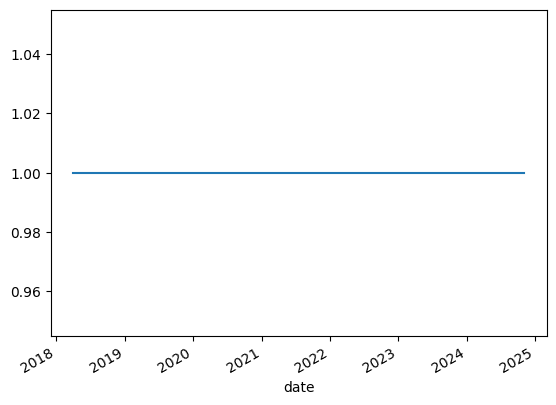

In [76]:
final_portfolio.sort_values(by='date').groupby(['date'])['Wt'].sum().plot()

In [95]:
final_portfolio.dtypes

date                     datetime64[ns]
BB Symbol                        object
Stock Name                       object
Strat                            object
factor_quantile                  object
Wt                              float64
date_df                  datetime64[ns]
Price                           float64
Sector                           object
momentum_6                      float64
momentum_RA_6                   float64
momentum_9                      float64
momentum_RA_9                   float64
momentum_12                     float64
momentum_RA_12                  float64
MIF                             float64
momentum_6_rank                 float64
momentum__6_decile              float64
momentum_RA_6_rank              float64
momentum_RA_6_decile            float64
momentum_9_rank                 float64
momentum__9_decile              float64
momentum_RA_9_rank              float64
momentum_RA_9_decile            float64
momentum_12_rank                float64


In [2]:
# save portfolios one by one

In [139]:
final_portfolio.to_csv("port_12mom_ra_6decile.csv")
#final_portfolio.to_csv("port_12mom_6decile.csv")

Portfolio Inclusion and Exclusion Rules
Overview
The inclusion and exclusion rules are designed to dynamically adjust the securities in the portfolio based on specified thresholds applied to a chosen ranking metric (e.g., momentum_decile). These rules ensure the portfolio is re-evaluated at the beginning of each quarter and weekly throughout each quarter, with adjustments made to maintain a consistent total weight of 1.

Rules
Initial Portfolio Setup (First Date)

On the first date in the dataset:
All securities are included in the portfolio without any threshold check.
Each security is assigned an equal weight, calculated as 1 / number of securities (excluding the Cash placeholder).
Cash is initially set to zero since no securities are excluded on the first date.
Quarter Start Evaluations (Excluding the Very First Date)

At the start of each quarter, all securities present in the portfolio are re-evaluated based on their momentum_decile or specified ranking metric.
Inclusion Rule:
New Securities: If a security appears for the first time on a quarter start date, it is automatically included without applying the threshold.
Previously Held Securities: Securities carried over from the previous quarter are included only if they meet the threshold criteria (momentum_decile ≤ threshold).
Threshold Setting:
For this example, the threshold is set to 4, so any security with a momentum_decile of 4 or lower is included.
Securities with a momentum_decile greater than 4 are excluded and their weights are transferred to Cash.
Weight Adjustment:
Each included security is assigned the initial equal weight (1 / number of securities).
Cash weight is set to absorb the total weight of excluded securities, ensuring the portfolio’s total weight sums to 1.
Weekly Evaluations Within Each Quarter

Between quarter starts, weekly evaluations are conducted to adjust the portfolio based on the threshold criteria.
Exclusion Rule:
Securities are excluded if their momentum_decile exceeds the threshold (> threshold).
For a threshold of 4, this means any security with a momentum_decile of 5 or higher is excluded.
Once excluded within a quarter, a security remains excluded until the next quarter start.
Weight Adjustment:
Each included security retains the fixed equal weight (1 / initial_security_count).
The weight of excluded securities is transferred to Cash, ensuring the portfolio’s total weight remains at 1 on each date.
Consistent Weighting and Cash Adjustments

At each evaluation point (whether a quarter start or weekly check), the weights of included securities remain constant and equal across the portfolio.
Cash acts as a buffer to maintain a total weight of 1 on each date. The Cash weight increases as securities are excluded and decreases if previously excluded securities are re-included at a quarter start.